## A. Loading Dataset from ScikitLearn

### Step 1
Load `iris` dataset from ScikitLearn using `load_iris()`. Assign the dataset to `X` and the target values to `y`.

In [11]:
from sklearn.datasets import load_iris

### Step 2
Print the dataset keys using `iris_dataset.keys()`

In [12]:
iris_dataset=load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Step 3
Print the names of the categories in the target file

In [13]:
print("Iris dataset target names:\n", iris_dataset['target_names'])

Iris dataset target names:
 ['setosa' 'versicolor' 'virginica']


### Step 4
Print the feature names in the Iris dataset

In [14]:
print("Iris dataset feature names:\n", iris_dataset['feature_names'])

Iris dataset feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Step 5
Print the type of the Iris dataset.

In [15]:
print('Iris dataset type type:\n', type(iris_dataset))

Iris dataset type type:
 <class 'sklearn.utils.Bunch'>


### Step 6
Print the shape of the Iris dataset.

In [36]:
print("Shape of the dataset:\n", iris_dataset["data"].shape)
import pandas as pd
pd.isna(iris_dataset)
iris_dataset
panda_iris=pd.DataFrame(iris_dataset["data"])
#print("Shape of the dataset:\n", panda_iris[1].value_counts())

Shape of the dataset:
 (150, 4)


### Step 7
Print the first five rows of the Iris dataset.

In [37]:
iris_dataset["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Step 8
Print the type of the target variable of Iris dataset.

In [38]:
type(iris_dataset["target"])

numpy.ndarray

### Step 9
Print the shape of the target variable of Iris dataset.

In [39]:
iris_dataset["target"].shape

(150,)

### Step 10
Print the entire target variable values of the Iris dataset.

In [85]:
print("target array of dataset:\n",iris_dataset["target"])
target_df=pd.DataFrame(iris_dataset["target"])
print("target value counts:\n",target_df[0].value_counts())
data_df=pd.DataFrame(iris_dataset["data"], columns=iris_dataset["feature_names"])
# How do we group by?


target array of dataset:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target value counts:
 2    50
1    50
0    50
Name: 0, dtype: int64


### Step 11
Import numpy with `import numpy as np` and use the `numpy.unique()` function to print the unique values of the target variable of Iris dataset

In [86]:
import numpy as np
np.unique(iris_dataset["target"])

array([0, 1, 2])

### Step 12
Split dataset into train and test datasets using `from sklearn.model_selection import train_test_split`

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(iris_dataset["data"], iris_dataset["target"])

### Step 13
Print the shape of train/test datasets and the train/test target variables.

In [88]:
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

(38, 4) (112, 4) (38,) (112,)


### Step 14
Build your K-neighbors classifier for nearest neighbor of 1 using `from sklearn.neighbors import KNeighborsClassifier`, fit the model to your train dataset and make a prediction for teh data point of `[5, 1.9, 1, 0.2]`. Print your prediction class value as an integer and also the corresponding string label.

In [120]:
from sklearn.neighbors import KNeighborsClassifier 
import plotly
import plotly.express as px
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='manhattan')
knn.fit(X_train,y_train)
y_test=knn.predict(X_test)
y_test

y_score = knn.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()



ModuleNotFoundError: No module named 'plotly'

# B. Loading a Dataset and exploring it

### Step 1
Import the modules needed to explore the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Step 2
Import `auto_mpg.csv` dataset using pandas'`read_csv` function. Print the first three samples from your dataset, print the index range of the observations, and print the column names of your dataset

In [103]:
data_auto=pd.read_csv("auto_mpg.csv")
data_auto.columns
data_auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


### Step 3
Assign `mpg` column as output and name it as `y` and the rest of the data as the features and assign it to `X`. Print the shape of X.

In [106]:
X=data_auto.drop("mpg", axis=1)
y=data_auto["mpg"]
X.shape

(398, 8)

### Step 4
Bonus: Check the dataset if there are any missing values in any of the columns using `isnull().any()` functions.

In [107]:
data_auto.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

### Step 5
Check the data types of each feature. Which columns are continuous and which are categorical?

In [108]:
data_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### Step 6
Look at the unique elements of horsepower

In [109]:
data_auto.horsepower.unique

<bound method Series.unique of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64>

### Step 7
Let's describe data since everything looks in order. 
- See the statistical details of the dataset using `describe` and `info` methods.

In [112]:
#data_auto.describe
data_auto.info



<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu

### Step 8
Let's specifically look at the description of the mpg feature

In [115]:
data_auto["mpg"]

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

### Step 9
Visualize the distribution of the features of the data using `hist` method, use `bins=20`. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0395da110>,
      dtype=object)

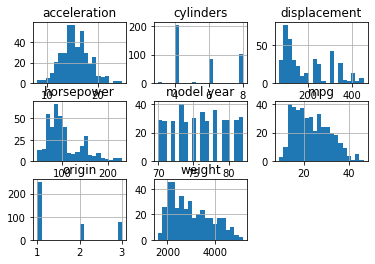

In [121]:
data_auto.hist(bins=20)

### Step 10
BONUS: Visualize the relationships between these data points. 

- Create a function to scale your dataset by using the formula $b=\frac{x-min}{max-min}$. 
- Using this function, scale `displacement`, `horsepower`, `acceleration`, weight`, and `mpg`.
- Create a boxplot of `mpg` for different `origin` values before and after scaling. 
